In [65]:
# STEP - 1 IMPORT NECESSAARY LIBRARY
import pandas as pd
%matplotlib inline 
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import LabelEncoder  
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# STEP - 2 LOADING THE dfSET
df = pd.read_csv('Movies.csv', encoding='ISO-8859-1')  

In [5]:
# UNDERSTANDING THE dfSET
df.dropna(inplace = True)

In [6]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [7]:
df.shape

(5659, 10)

In [8]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [9]:
print(df.isnull().sum())  

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [10]:
df = df.drop_duplicates() 

In [11]:
df.shape

(5659, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


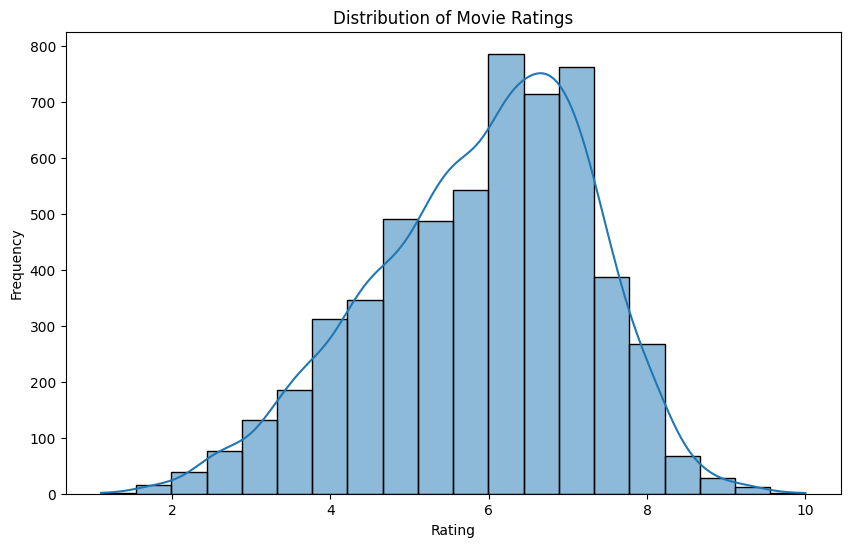

In [13]:
# DATA VISUALIZATION (Exploratory df Anlysis)
# Distribution of ratings  
plt.figure(figsize=(10, 6))  
sns.histplot(df['Rating'], bins=20, kde=True)  
plt.title('Distribution of Movie Ratings')  
plt.xlabel('Rating')  
plt.ylabel('Frequency')  
plt.show()  

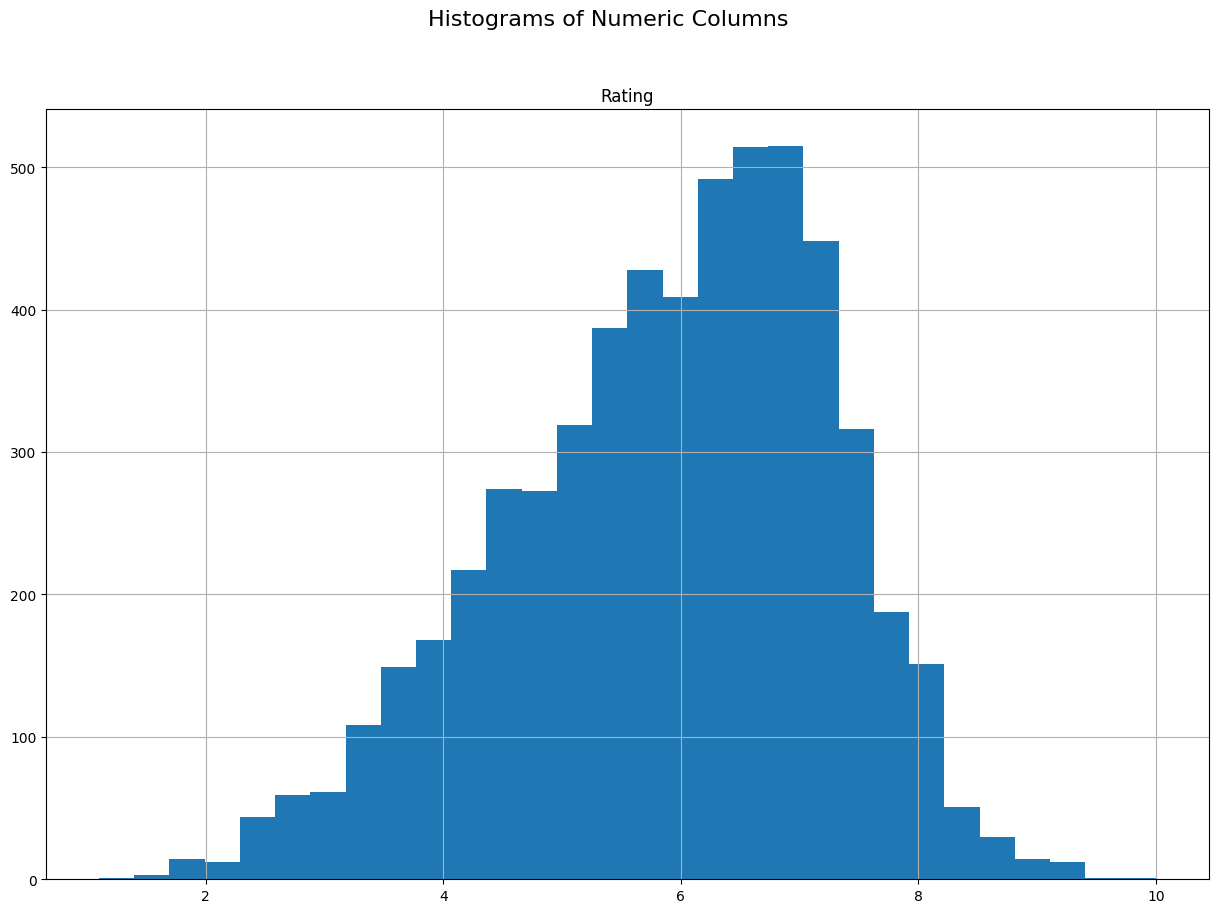

In [14]:
# Histogram for each numeric column  
df.hist(figsize=(15, 10), bins=30)  
plt.suptitle('Histograms of Numeric Columns', fontsize=16)  
plt.show()  

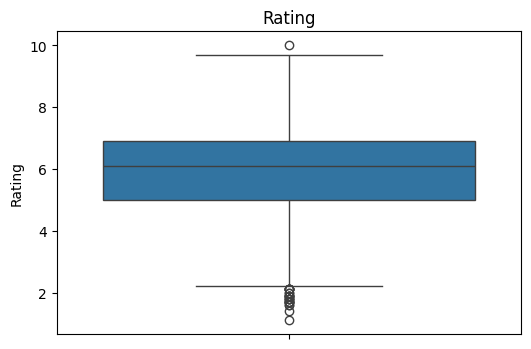

In [15]:
# Box plots for numeric features to visualize outliers  
plt.figure(figsize=(15, 10))  
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):  
    plt.subplot(3, 3, i + 1)  # Adjust the subplot depending on the number of numeric columns  
    sns.boxplot(y=df[col])  
    plt.title(col)  
plt.tight_layout()  
plt.show()  

In [17]:
# Count the occurrences of each genre  
genre_counts = df['Genre'].value_counts()  

In [25]:
# Create a dfFrame from the top genres for hue variable  
top_genres_df = top_genres.reset_index()  
top_genres_df.columns = ['Genre', 'Count']  

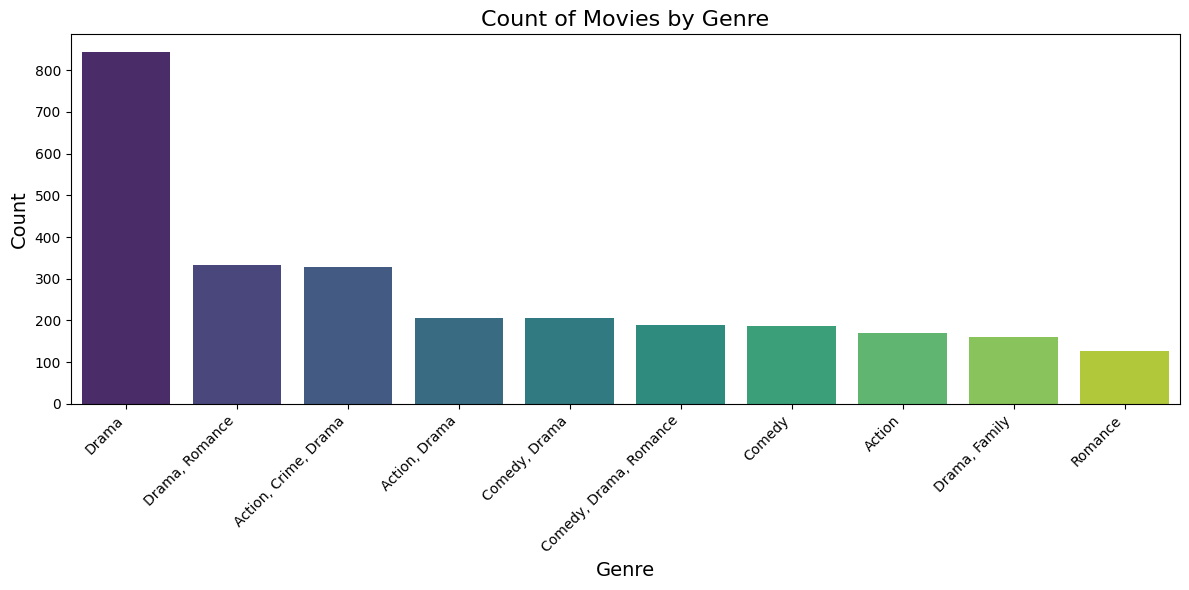

In [28]:
# Create the count plot with a hue variable  
plt.figure(figsize=(12, 6))  
sns.barplot(df=top_genres_df, x='Genre', y='Count', hue='Genre', palette='viridis', dodge=False)  
plt.title('Count of Movies by Genre', fontsize=16)  
plt.xlabel('Genre', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()    
plt.show() 

In [20]:
# Get the next 10 genres (after the top 10)  
next_genres = genre_counts.iloc[10:20]  

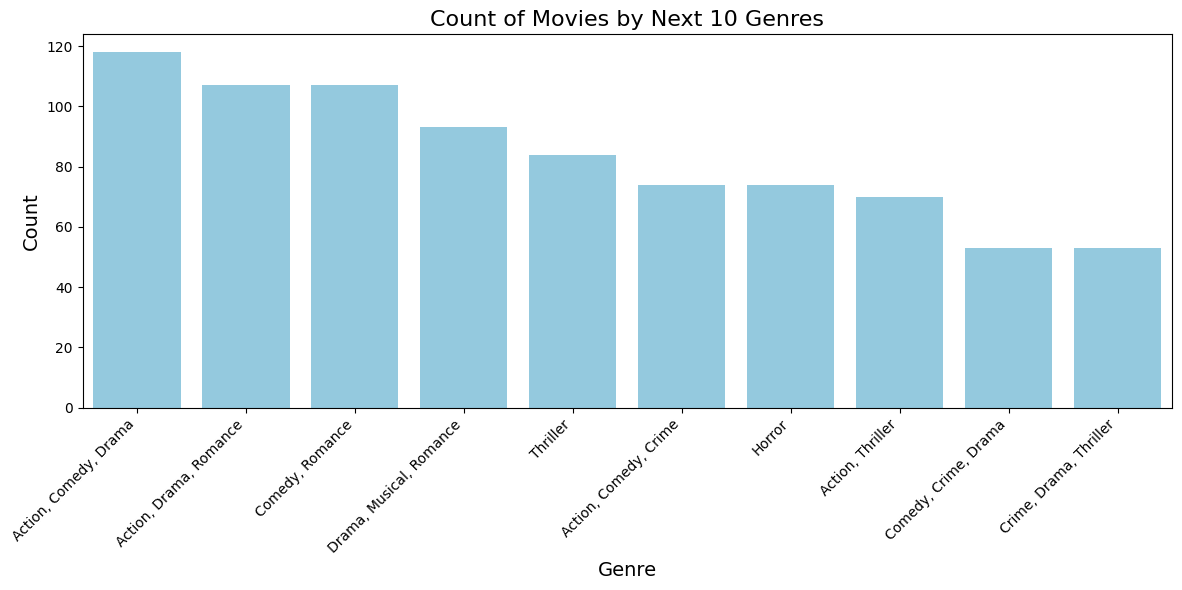

In [22]:
# Create the count plot  
plt.figure(figsize=(12, 6))  
sns.barplot(x=next_genres.index, y=next_genres.values, color='skyblue')  # Use a single color or a specific color palette  
plt.title('Count of Movies by Next 10 Genres', fontsize=16)  
plt.xlabel('Genre', fontsize=14)  
plt.ylabel('Count', fontsize=14)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  # Adjust layout to prevent clipping  
plt.show()  

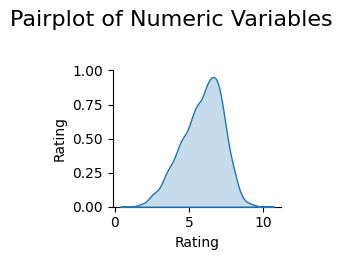

In [31]:
# Pairplot for visualizing relationships between numeric variables  
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), diag_kind='kde')  
plt.suptitle('Pairplot of Numeric Variables', fontsize=16, y=1.02)  
plt.tight_layout()  
plt.show() 

In [38]:
print(df.dtypes)  


Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [39]:
# Example: Average rating by genre  
avg_rating_by_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)  
print(avg_rating_by_genre) 

Genre
History, Romance                9.4
Documentary, Family, History    9.3
Documentary, Music              8.9
Documentary, Thriller           8.7
Documentary, Sport              8.6
                               ... 
Comedy, Horror, Musical         2.7
Action, Fantasy, Sci-Fi         2.7
Family, Music, Romance          2.6
Comedy, Family, Sci-Fi          2.4
Action, Comedy, Horror          2.4
Name: Rating, Length: 376, dtype: float64


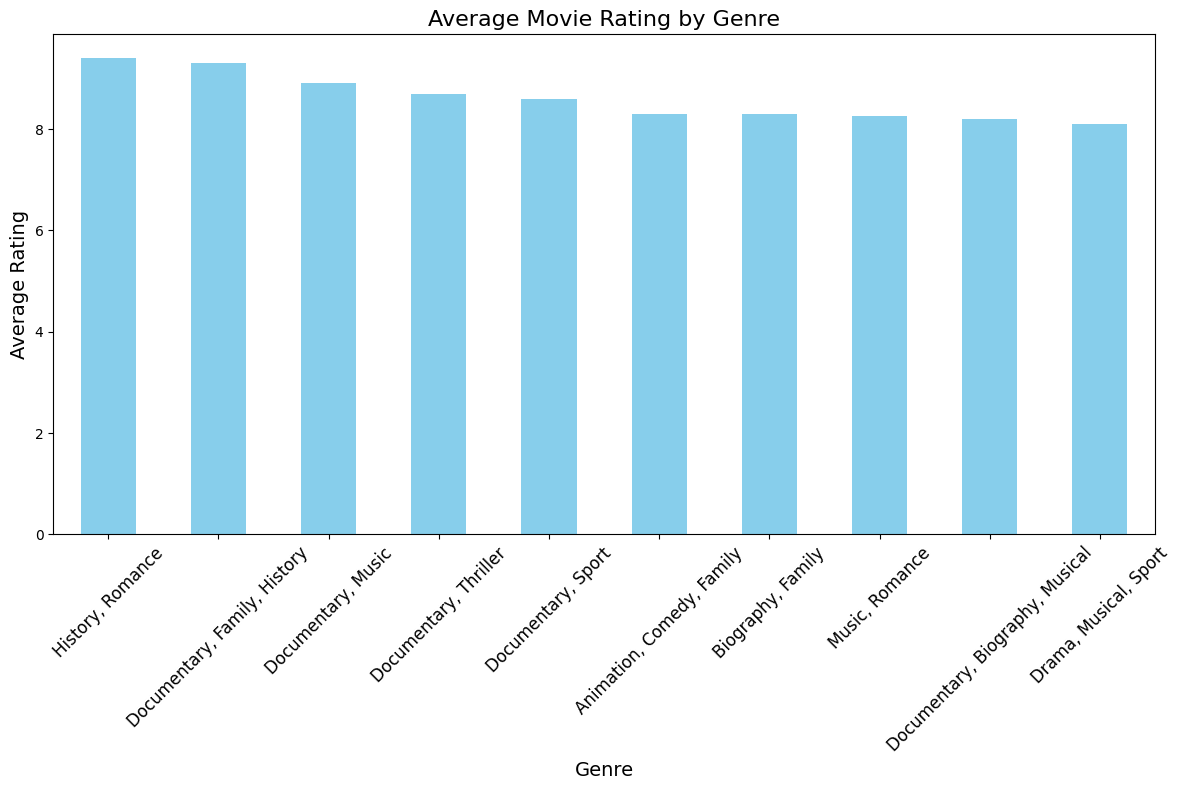

In [43]:
# Calculate average rating by genre  
avg_rating_by_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)    
plt.figure(figsize=(12, 8))  
top_genres = avg_rating_by_genre.head(10)  

# Bar plot of average rating by genre  
top_genres.plot(kind='bar', color='skyblue')    
plt.title('Average Movie Rating by Genre', fontsize=16)  
plt.xlabel('Genre', fontsize=14)  
plt.ylabel('Average Rating', fontsize=14)    
plt.xticks(rotation=45, fontsize=12)  

plt.tight_layout()  
plt.show()  

In [66]:
# DATA PREPROCESSING
# Handle missing values  
df = df.dropna(subset=['Rating'])  

In [79]:
X = df[['Year', 'Actor 1']]  # Modify according to actual column names  
y = df['Rating']  

In [88]:
# Transform categorical features using OneHotEncoder with handle_unknown set to 'ignore'  
categorical_features = ['Year', 'Actor 1']  
transformer = ColumnTransformer(transformers=[  
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  
])  

# Create a pipeline with transformation and linear regression model  
pipeline = Pipeline(steps=[  
    ('preprocessor', transformer),  
    ('model', LinearRegression())  
])   

In [89]:
# Split the data again if you need to  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [90]:
# Step 7: Model Training
# Train the model  
pipeline.fit(X_train, y_train)  

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Year', 'Actor 1'])])),
                ('model', LinearRegression())])

In [91]:
# Make predictions  
y_pred = pipeline.predict(X_test)

In [92]:
# Evaluate the model  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f'Mean Squared Error: {mse}')  
print(f'R^2 Score: {r2}')  

Mean Squared Error: 1.7221397176415303
R^2 Score: 0.06999021098866931


In [93]:
# Create new movie data for prediction  
new_movie_data = pd.DataFrame({  
    'Genre': ['Action'],  
    'Director': ['James Cameron'],  
    'Actors': ['Arnold Schwarzenegger, Linda Hamilton']  
})  


In [100]:
input_data = pd.DataFrame({'Year': ['2024'], 'Actor 1': ['Sayani Gupta']})  

In [101]:
predicted_rating = pipeline.predict(input_data) 

In [102]:
print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: [7.71308733]
